In [ ]:
import pandas as pd
import numpy as np
# import scicit learn decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Preparing the dataset

In [ ]:
passenger_data = pd.read_csv("Titanic-Dataset.csv")
print(passenger_data.shape)
passenger_data.head()

In [ ]:
# select features (PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) and target (survived)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target = passenger_data.columns[1]

# delete rows with missing values in the Age column
passenger_data = passenger_data.dropna(subset=["Age"])

# delete rows with missing values in the Embarked column
passenger_data = passenger_data.dropna(subset=["Embarked"])

# encode the sex column (Female = 0, Male = 1)
passenger_data["Sex"] = passenger_data["Sex"].replace({"female": 0, "male": 1})
# one-hot encode the Embarked column
passenger_data = pd.get_dummies(passenger_data, columns=["Embarked"])

passenger_data.head()

In [ ]:

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(passenger_data[features], passenger_data[target], test_size=0.2, random_state=42)

## Decision Tree Classifier
### Max depth: 3

In [ ]:
# create a decision tree model with max_depth=3
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)


In [ ]:
# make predictions
predictions = model.predict(X_test)

# calculate the accuracy of the model
accuracy = np.mean(predictions == y_test)  
print("Accuracy: ", accuracy)

In [ ]:
# get the feature importances and print them with their names
feature_importances = model.feature_importances_
feature_names = X_train.columns 
print("Feature importances:")
for name, importance in zip(feature_names, feature_importances):
    print(name, importance)

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import re

# Export the decision tree as a dot file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=feature_names,
                           class_names=['Survived', 'Not Survived'],
                           filled=True, rounded=True,
                           special_characters=True)


# Function to remove 'samples' and 'value' from the labels
def modify_dot(dot_data):
    # Use regular expressions to modify the labels
    # dot_data = re.sub(r'<br/>samples = \d+', '', dot_data)
    dot_data = re.sub(r'<br/>value = \[.*?\]', '', dot_data)
    # dot_data = re.sub(r'<br/>gini = [0-9.]+', '', dot_data)
    # dot_data = re.sub(r'<br/>class = \w+', '', dot_data)
    return dot_data

# Modify the dot data
modified_dot_data = modify_dot(dot_data)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Generate the image file
graph.write_png('decision_tree_depth_3.png')

# Display the image
Image(graph.create_png())

### Max Depth 7

In [ ]:
model2 = DecisionTreeClassifier(random_state=42, max_depth=7)
model2.fit(X_train, y_train)
# make predictions
predictions2 = model2.predict(X_test)

# calculate the accuracy of the model
accuracy2 = np.mean(predictions2 == y_test)  
print("Accuracy: ", accuracy2)

In [ ]:
# Export the decision tree as a dot file
dot_data = export_graphviz(model2, out_file=None,
                           feature_names=feature_names,
                           class_names=['Survived', 'Not Survived'],
                           filled=True, rounded=True,
                           special_characters=True)


# Function to remove 'samples' and 'value' from the labels
def modify_dot(dot_data):
    # Use regular expressions to modify the labels
    # dot_data = re.sub(r'<br/>samples = \d+', '', dot_data)
    dot_data = re.sub(r'<br/>value = \[.*?\]', '', dot_data)
    # dot_data = re.sub(r'<br/>gini = [0-9.]+', '', dot_data)
    # dot_data = re.sub(r'<br/>class = \w+', '', dot_data)
    return dot_data

# Modify the dot data
modified_dot_data = modify_dot(dot_data)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(modified_dot_data)

# Generate the image file
graph.write_png('decision_tree_depth_7.png')

# Display the image
Image(graph.create_png())

In [ ]:
# grid search for the best max_depth
max_depths = np.arange(1, 21)
accuracies = []
for max_depth in max_depths:
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)

# find the max_depth that gives the highest accuracy
best_max_depth = max_depths[np.argmax(accuracies)]
print("Best max_depth:", best_max_depth)
print("Best accuracy:", accuracies[np.argmax(accuracies)])

In [ ]:
# create a graph of max_depths vs. accuracies
import matplotlib.pyplot as plt
plt.plot(max_depths, accuracies)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("max_depth vs. accuracy")
plt.show()

## Random Forest

In [ ]:
# perform a grid search to find the best hyperparameters
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

# Create a dictionary with the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)
# Create a random forest classifier model with the best hyperparameters
random_forest_best = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                           max_depth=best_params['max_depth'],
                                           random_state=42)

# Fit the model to the training set
random_forest_best.fit(X_train, y_train)

# make predictions
random_forest_best_pred = random_forest_best.predict(X_test)

# calculate the accuracy of the model
accuracy_random_forest_best = np.mean(random_forest_best_pred == y_test)
print("Accuracy: ", accuracy_random_forest_best)

In [ ]:
# get the feature importances of the best model and print them with their names
feature_importances = random_forest_best.feature_importances_
feature_names = X_train.columns
print("Feature importances:")
for name, importance in zip(feature_names, feature_importances):
    print(name, importance)


## Boosting

In [ ]:
# create a model using the adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

# make predictions
adaboost_predictions = adaboost_model.predict(X_test)

# calculate the accuracy of the model
adaboost_accuracy = np.mean(adaboost_predictions == y_test)
print("Accuracy: ", adaboost_accuracy)

In [ ]:
# print the feature importances
feature_importances = adaboost_model.feature_importances_
feature_names = X_train.columns
print("Feature importances:")
for name, importance in zip(feature_names, feature_importances):
    print(name, importance)

## Comparison of the feature importances

In [ ]:
# create a dataframe with the feature importances from all the models
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree Depth 3': model.feature_importances_,
    'Decision Tree Depth 7': model2.feature_importances_,
    'Random Forest': random_forest_best.feature_importances_,
    'AdaBoost': adaboost_model.feature_importances_
})

# create a heatmap from the data
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importances_df.set_index('Feature'), annot=True, cmap='coolwarm')
plt.title("Feature Importances")
plt.show()


In [ ]:
# save the plot
plt.figure(figsize=(10, 5))
sns.heatmap(feature_importances_df.set_index('Feature'), annot=True, cmap='coolwarm')
plt.title("Feature Importances")
plt.savefig("feature_importances_heatmap.png")

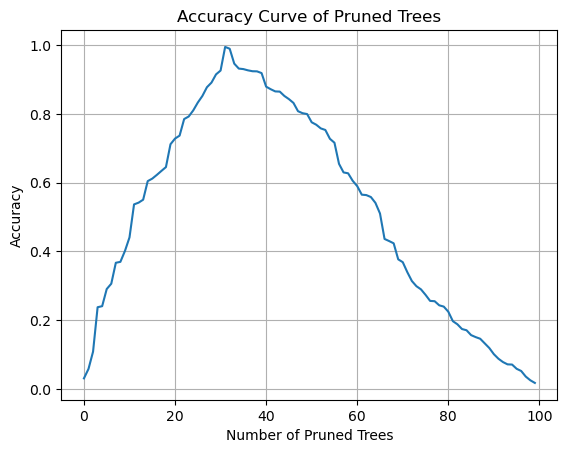

In [3]:
import matplotlib.pyplot as plt

# Define the number of pruned trees (k)
k = 20

# Define the accuracy values for each pruned tree
accuracy_values = [0.2408, 0.2906, 0.3061, 0.3670, 0.3697, 0.4013,
 0.4408, 0.5368, 0.5419, 0.5505, 0.6045, 0.6118, 0.6226, 0.6341, 0.6453, 0.7118,
 0.7283, 0.7369, 0.7851, 0.7925, 0.8103, 0.8331, 0.8522, 0.8776, 0.8911, 0.9150,
 0.9262, 0.9949, 0.9896, 0.9463, 0.9319, 0.9304, 0.9268, 0.9242, 0.9238, 0.9188,
 0.8793, 0.8719, 0.8655, 0.8649, 0.8523, 0.8431, 0.8320, 0.8079, 0.8021, 0.7996,
 0.7757, 0.7686, 0.7579, 0.7533, 0.7277, 0.7162, 0.6548, 0.6298, 0.6273, 0.6056,
 0.5899, 0.5651, 0.5639, 0.5582, 0.5412, 0.5103, 0.4363, 0.4302, 0.4236, 0.3770,
 0.3687, 0.3396, 0.3139, 0.2988, 0.2896, 0.2737, 0.2561, 0.2552, 0.2433, 0.2395,
 0.2246, 0.1971, 0.1880, 0.1743, 0.1707, 0.1566, 0.1508, 0.1460, 0.1325, 0.1190,
 0.1011, 0.0879, 0.0782, 0.0715]


# Define the number of trees (T) from T_0 to T_k
num_trees = list(range(0, len(accuracy_values)))

# Plot the accuracy curve
plt.plot(num_trees, accuracy_values)
plt.xlabel('Number of Pruned Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve of Pruned Trees')
plt.grid(True)
plt.show()